# An Introduction to Descriptive Statistics with `R`

Now that we have the basics of `r` data carpentry covered, we are going to once again begin to dive into descriptive statistics but this time using `r`.

### The Data

In this lab we are once again be working with Game of Thrones, *A Song of Ice and Fire*, data. We introduced this data in module 1 [Soft Introduction to Descriptive Statistics with `NumPy`](../../module1/labs/intro_descriptive_stats_python.ipynb)lab.

![GoT](../images/GoT_death.gif)

## Read in the Data

In [1]:
library(dplyr)

# read in Game of Thrones data
file <- read.csv('/dsa/data/all_datasets/game-of-thrones/GoT_age_at_death.csv')


# a bit of column clean up
df <-file %>%
# change column names. "Dead" and "Gender" are the new, more readable names.
    rename(Dead = `Dead..1...dead.`, Gender = `Gender..1.male.`) %>% 
# change datatypes for columns. Making the data a factor allows R to treat "Dead" and "Gender" as categories
# Treating these variables as catetories enables easier summarization of data by each column. 
# Read more about R factors here: https://www.r-bloggers.com/data-types-part-3-factors/ 
    mutate(Dead = as.factor(Dead), Gender = as.factor(Gender), Affiliation = as.factor(Affiliation)) 

# show first few rows
head(df)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Character,Age,Dead,Gender,Affiliation
<fct>,<int>,<fct>,<fct>,<fct>
Sandor Clegan,29,1,1,4
Benjen Stark,35,1,1,10
Syrio Forel,41,1,1,1
Tysha,29,0,0,4
Jeyne Pool,12,1,0,1
Imry Florent,35,1,1,2


## Descriptive Statistics

Descriptive statistics reveal the underlying characteristics of the data. Together with simple visualizations, descriptive statistics can tell us a lot about what the data looks like. But exactly how do they help us?

### Visualizing the Distribution

In much of this lab, we are going to be looking at the *distribution* of `Age` variable under certain conditions. The distribution of a variable shows us how the data are spread. One way of visualizing this is through the use of a histogram. A histogram is a univariate (meaning "single variable") plot that displays the range of values of a variable on the x-axis (horizontal axis). On the graph, there are bins that extend upward on the graph and represent the count of values that exist within that bin's value range. Take the histogram of the `df$Age` below. The blue section represents a single bin between the values of 52 and 54 years of age. There are ten rows of data that fall in the bin, which you can visualize by going up the bin and looking at the value on the y-axis. 

There are other ways to visualize the distribution, but the histogram is one of the most common and convenient ways to understand where data is concentrated and where it is more sparse. But don't worry, we will touch on these other visualizations as well.

<img src="../images/hist_bin_r.jpg" alt="Hist" style="width: 450px;"/>

Often we will be dealing with a lot of values within a variable, and while a distribution is nice to visualize how the data is spread out, descriptive statistics provide a way for us to simplify the variable down into one number.

### The Mean

When people talk about the average of a dataset, they are most often referring to the arithmetic mean. In `R`, finding the mean is as simple as calling the `mean()` function on numerical and date-time objects. For example, if we wanted to find the mean `Age` of our current dataset, it would look like the following:

In [2]:
# This gives us the average for age. Mean is another word for average
mean(df$Age)

[1] 35.59892

We can see that the mean age of the entire dataset is about 35.6 years old. However, sometimes knowing just the mean isn't good enough for analysis. We also want to know how spread out the data points are around the mean. For that we would use another statistic.

### Standard Deviation

The standard deviation is an expression of the amount of variance, or how spread out the data points are in a dataset. The higher the standard deviation, the more spread out the points are from the mean. Finding the standard deviation in `R` is just as simple as finding the mean.  

In [3]:
# This gives us the standard deviation for age. Standard deviation gives us a measure of how diverse the ages are. 
# If everyone is 30 years old, the standard deviation will be zero, for example. 
sd(df$Age)

[1] 19.01763

So one standard deviation away from the mean in the sample's age is about plus or minus 19 years. Two deviations would about plus or minus 38 years and so on. You will notice that once we get to 2 standard deviations below the mean, we start to talk about negative age, which we know to be impossible.  This tells us something about our data, that there are data points (or people) who are quite a bit older than the mean age of this sample. Let's take a look at our distribution again. 

<img src="../images/hist_bin_r.jpg" style="width: 750px;"/>




We can see that there are some old people in this dataset, which increases the spread of the data.

### The Median
The mean and standard deviation are highly influenced by extreme values known as outliers. Outliers have the ability to pull the distribution in one direction or the other. For example, imagine we had the ages of 10, 11, 13, 13, 11, and 153. It isn't hard to tell that 153 is an outlier in this sample, but since the mean takes all of the points into consideration, it will be highly influenced by it. The mean of this sample would be 35.16666 with a standard deviation of 57.739 years! 

Sometimes you want an average value that isn't highly influenced by these outlying values. In this case, you would use the median. The median is the middle positioned value in an ordered set of numbers. Following our example above, we would first order our numbers from least to greatest (or vise versa), 10, 11, 11, 13, 13, 153 and then select the number in the middle position. Since this list of numbers is even and there is no middle value, we would take the two most central values and find their mean. These two values would be 11 and 13, whose mean is 12. So the median is 12. 

The median is simple to find with `R` simply requires you to call the function `median()` on a numerical object. Remember, the median is not sensitive to outliers and, therefore, is sometimes more preferable than the mean when trying to find the average.

In [4]:
# Median is the midpoint in the data. There are an equal number of records above and below this value.
median(df$Age)

[1] 35

### Quartiles

Finding the quartiles (splitting the data in 4 equal groups) of a numerical object is going to tell us how many points are within 25% above and below the median, as well as the maximum and minimum points. 

In `R`, you may recall, the `summary` function will print the quartiles as well as the mean of a numeric variable. `R` also has a `quartile` function. Let's try it out below. 



In [5]:
# Finding the quartiles (splitting the data in 4 equal groups) of a numerical object is going to tell us 
# how many points are within 25% above and below the median, as well as the maximum and minimum points.  
quantile(df$Age)

0%  25%  50%  75% 100% 
   0   20   35   47  102

There are multiple values here to discuss. We will start with the simplest. We see the minimum age (0) of the dataset and its maximum age (102). 50% is going to be the median, as you can see from the `median` function called above. In other words, what this is telling us is that 50% of the data points fall below the age of 35 and 50% fall above. 100% of the data points are below or equal to the age of 102. This makes it simpler to interpret the 25% and the 75%, in which a quarter and three quarters of the ages fall below 20 and 47 respectively. 

### Running a Summary

`R` provides a convenient function for us to see what the quartiles and mean of variable are by simply calling the `summary()` function on a numeric object.

In [6]:
summary(df$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    20.0    35.0    35.6    47.0   102.0 

This isn't limited to numeric objects however. Sometimes we want to find some descriptive statistics on factors. In this case, running a summary on a variable like `Gender` will report a count of each factor level, or how many males and females there are. Let's do just that...

In [7]:
summary(df$Gender)

0   1 
 92 277

It may not be obvious, but the value 0 in this case indicates "female" and 1 indicates "male". We can see that there are 3 times as many males than females in this dataset.

But this isn't all we can do with the `summary` function. Instead of calling it on a single column in the dataset, we can call it on the entire data frame itself to report summary statistics of each column.

In [8]:
summary(df)

               Character        Age        Dead    Gender   Affiliation 
 High Septon        :  2   Min.   :  0.0   0:176   0: 92   3      : 59  
 Lannister Guardsmen:  2   1st Qu.: 20.0   1:193   1:277   1      : 47  
 Rhaenys Targaryen  :  2   Median : 35.0                   2      : 42  
 Addam Marband      :  1   Mean   : 35.6                   4      : 38  
 Adrack Humble      :  1   3rd Qu.: 47.0                   10     : 33  
 Aegon Blackfyre    :  1   Max.   :102.0                   6      : 25  
 (Other)            :360                                   (Other):125  

Running this type of simple summary of a dataframe is a really convenient way to get a glimpse of your dataset, and all that it takes is the dataframe object as the argument.

### Univariate Visualizations

We have been learning about how to run summary and descriptive statistics on a single variable. We have also seen some histograms. Now we can learn how to create some visualizations that can aid us in understanding our variables.

Below is how we can create a histogram in base `R`.

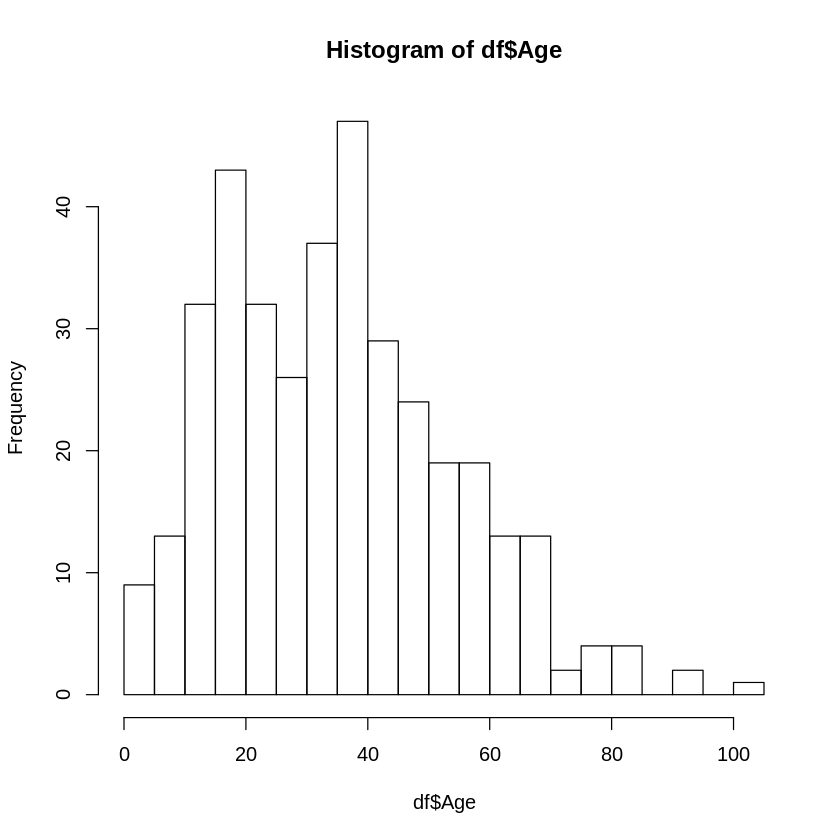

In [9]:
hist(df$Age, breaks = 20)

The first argument of the `hist()` function is the numerical object `df$Age`. In fact, this is the only argument that you need when calling `hist`. The `breaks` argument just adjusts the number of bins. Each bin has an equal range of values. For example, we passed 20 breaks as an argument. Given that our age range is from 0 to about 100, 20 breaks would be about a bin size of 5. So the first bin is from 0 to about 5, the second from 5 to about 10, and so on.

You may notice that the histograms that were used above, and the histograms that we are creating look different visually. For this lesson, we are going to focus on creating quick visuals for the purpose of investigating the data. In later lessons, we will be using the `ggplot2` package to make more aesthetically pleasing graphs.

Try playing around with the `breaks` argument to see how the histogram changes.

In [10]:
#experiment with histo() and breaks




We can also create what is called a box plot. The box plot displays the position of the quartiles that we discussed above.

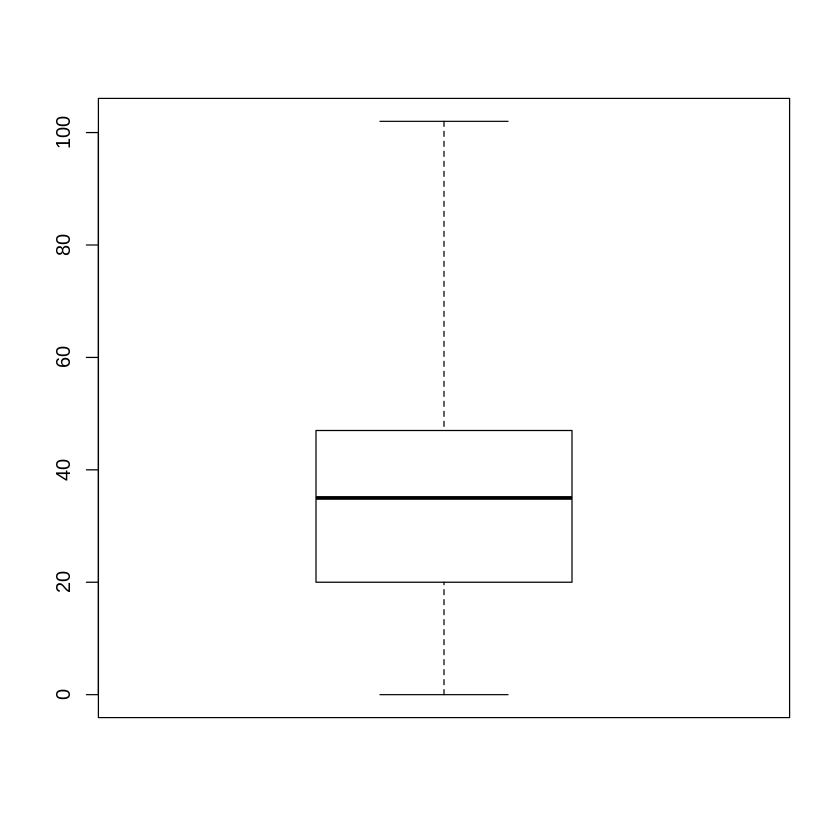

In [11]:
boxplot(df$Age, range = 0)

The boxed in portion has a solid line through it to indicate the position of the median. The outer portions of the box are the 1st quartile (25%) and the 3rd quartile (75%), while the bars extending out mark the minimum and maximum values. Specifying the `range` as 0 as an argument makes these bars extend to the minimum and maximum values. 

Let's see what happens when this isn't specified....

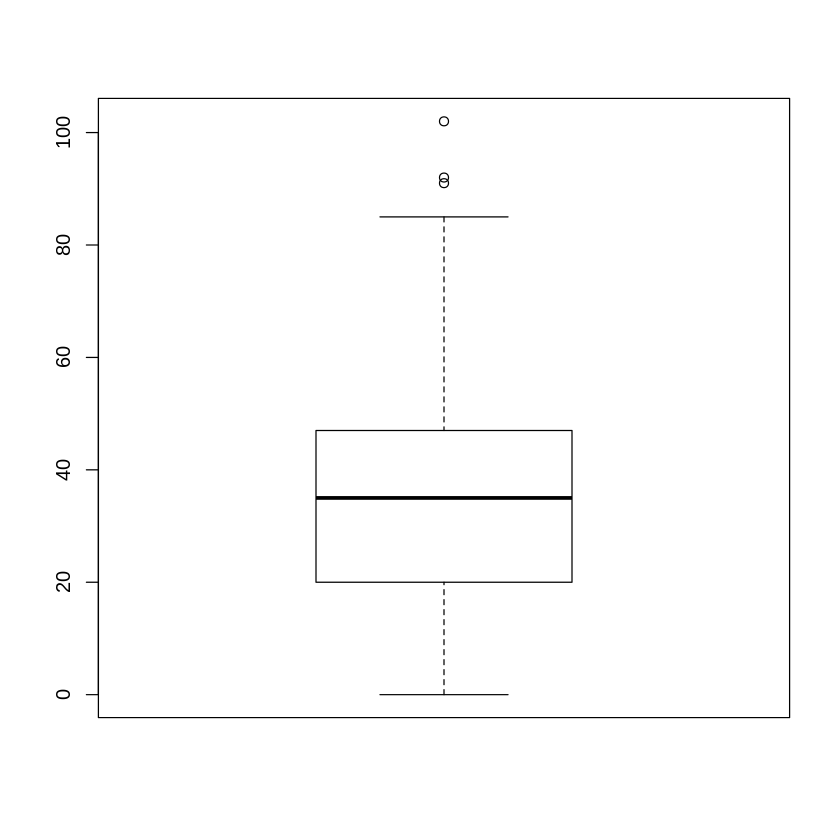

In [12]:
boxplot(df$Age)

Now we see that our upper bar doesn't reach the maximum age, but instead the greatest ages are represented as dots. This is a method to identify potential outliers. This is done by finding the inter-quartile range (IQR), or the 1st quartile (25%) subtracted from the 3rd quartile (75%). In this case the IQR is 47 - 20, or 27. The bars on this plot are known as the inner fences and they are found by taking the value of 3rd quartile + (1.5 X IQR)  and 1st quartile - (1.5 X IQR). In our case we get 87.5 and -20.5. Anything beyond these bounds are suspected outliers, which is why we see any point above 87.5 as dots. Since it is impossible to have a negative age, there are no suspected outliers beyond the lower inner fence.

## Bivariate Analysis

Sometimes we want to know how variables change together or whether or not there is a correlation between variables in your dataset. We can do that by looking at the covariance and correlation of two variables.

For this part, we are going to change gears and look at a different dataset to better aid us in our exploration.  This is the Stature Hand and Foot dataset, which simply gathers the height, hand length, and foot length of individuals.

Lets take a look below...

### Read in the Data

In [13]:
file2 <- read.csv("../../../datasets/stature-hand-foot/stature-hand-foot.csv")

df2 <- file2 %>%
    mutate(gender = as.factor(gender))

head(df2)

Warning message in file(file, "rt"):
“cannot open file '../../../datasets/stature-hand-foot/stature-hand-foot.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


### Covariance

The covariance of two variables measures how the two variables of the sample change linearly together. In other words, if one variable increases, what does the other one do? If the covariance is positive then as one variable increase so does the other. If it is negative then as one variable increases, the other decreases. If the value is 0 then an increase in one variable does not affect (linearly) the other variable.

Let's look at an example.

In [14]:
cov(df2$hand.length, df2$foot.length)

ERROR: Error in is.data.frame(y): object 'df2' not found


The above result is rather intuitive given what covariance tells us. An increase in hand length is generally associated with an increase in foot length, thus the positive covariance.

### Correlation

Now, what if we want to assess the strength of the linear relationship between these two variables. In other words, how much does an increase in one affect the movement of the other? Correlation is our statistic to assess that relationship.

In [15]:
cor(df2$hand.length, df2$foot.length)

ERROR: Error in is.data.frame(y): object 'df2' not found


This is a rather strong relationship between the hand length and foot length. A value of 1 indicates a perfectly, positive linear relationship (an increase of 1 in the first variable means an increase of 1 in the second), a value of -1 indicates, a perfect, negative linear relationship (an increase of 1 in the first variable means a decrease of 1 in the second variable), and a value of 0 means that there is not a linear relationship between the two variables. 

### Visualizing with a Scatter Plot

We can also visualize this relationship. There are several ways to do it, but one of the most common is to create a scatter plot. A scatter plot creates a point for each row and plots it based on 2 values. The first variable will be the x-axis, or the horizontal axis. In this case we will make it hand length. The y-axis, or the vertical axis represents the second variable, or foot length. Each row is plotted based on its value for hand length on the x-axis and its value for foot lenght on the y-axis.

Let's see what this looks like below...

In [16]:
plot(df2$hand.length,df2$foot.length)

ERROR: Error in plot(df2$hand.length, df2$foot.length): object 'df2' not found


So that wraps up our lab with descriptive statistics with `R`. In the practices, we will be combining our data manipulation skills with what our descriptive statistics. This allows us to add another layer of exploration and perhaps uncovers some more meaningful information and better relationships. 

# Save your Notebook, then `File > Close and Halt`